# DSCI 303 Final Project

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Loading in the Data

In [2]:
# load heart_2020_cleaned.csv and display the data
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Variable Descriptions

Target: HeartDisease (Yes/No)

Features:

- BMI - numerical values
- Smoking - Have you smoked at least 100 cigarettes in your entire life (about 5 packs)?
- AlcoholDrinking - Do you have more than 14 drinks of alcohol (men) or more than 7 (women) in a week?
- Stroke - Did you have a stroke?
- PhysicalHealth - For how many days during the past 30 days was your physical health not good?
- MentalHealth - For how many days during the past 30 days was your mental health not good?
- DiffWalking - Do you have serious difficulty walking or climbing stairs?
- PhysicalActivity - Have you played any sports (running, biking, etc.) in the past month?
- GenHealth - How can you define your general health?
- SleepTime - How many hours on average do you sleep?

There are more features which are self-explanatory.

## Basic Pre-Processing

In [3]:
# print the high-level information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# drop duplicate rows
print('Number of Duplicated Rows:', df.duplicated().sum())
df.drop_duplicates(inplace = True)
print('Number of Duplicated Rows After Dropping Duplicates (Should be 0):', df.duplicated().sum())

Number of Duplicated Rows: 18078
Number of Duplicated Rows After Dropping Duplicates (Should be 0): 0


In [5]:
# drop columns with more than 30% missing values
# threshold for minimum number of NA values in a column
min_count = int(0.3 * len(df))

# identify columns to drop
columns_to_drop = [col for col in df.columns if df[col].count() < min_count]
print('List of dropped columns:', ','.join(columns_to_drop))
df.drop(columns = columns_to_drop, inplace = True)

List of dropped columns: 


We have 301,717 patients with 17 columns of criteria to look at. There are no missing values, so not much data cleaning or wrangling needs to happen.

## Distribution Analysis

### Distribution of Numerical Features

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  301717.000000   301717.000000  301717.000000  301717.000000
mean       28.441970        3.572298       4.121475       7.084559
std         6.468134        8.140656       8.128288       1.467122
min        12.020000        0.000000       0.000000       1.000000
25%        24.030000        0.000000       0.000000       6.000000
50%        27.410000        0.000000       0.000000       7.000000
75%        31.650000        2.000000       4.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000


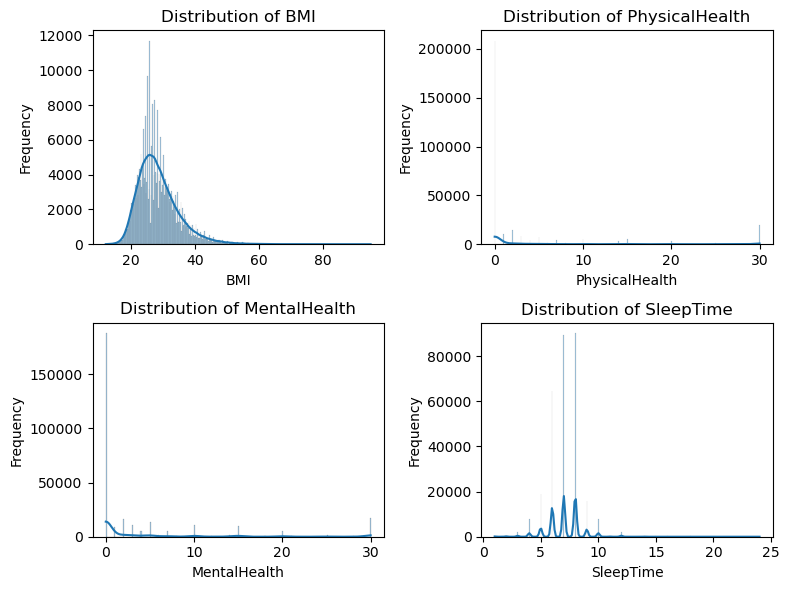

In [6]:
# descriptive statistics
# numerical features: BMI, PhysicalHealth, MentalHealth, and SleepTime

descriptive_stats = df.describe()
print(descriptive_stats)

# distribution of BMI, PhysicalHealth, MentalHealth, and SleepTime
features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]
plt.figure(figsize = (8, 6))

for x, feature in enumerate(features, 1):
    plt.subplot(2, 2, x)
    sns.histplot(df[feature], kde = True, alpha = 0.4)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of Categorical Features

There are 14 non numerical features including:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


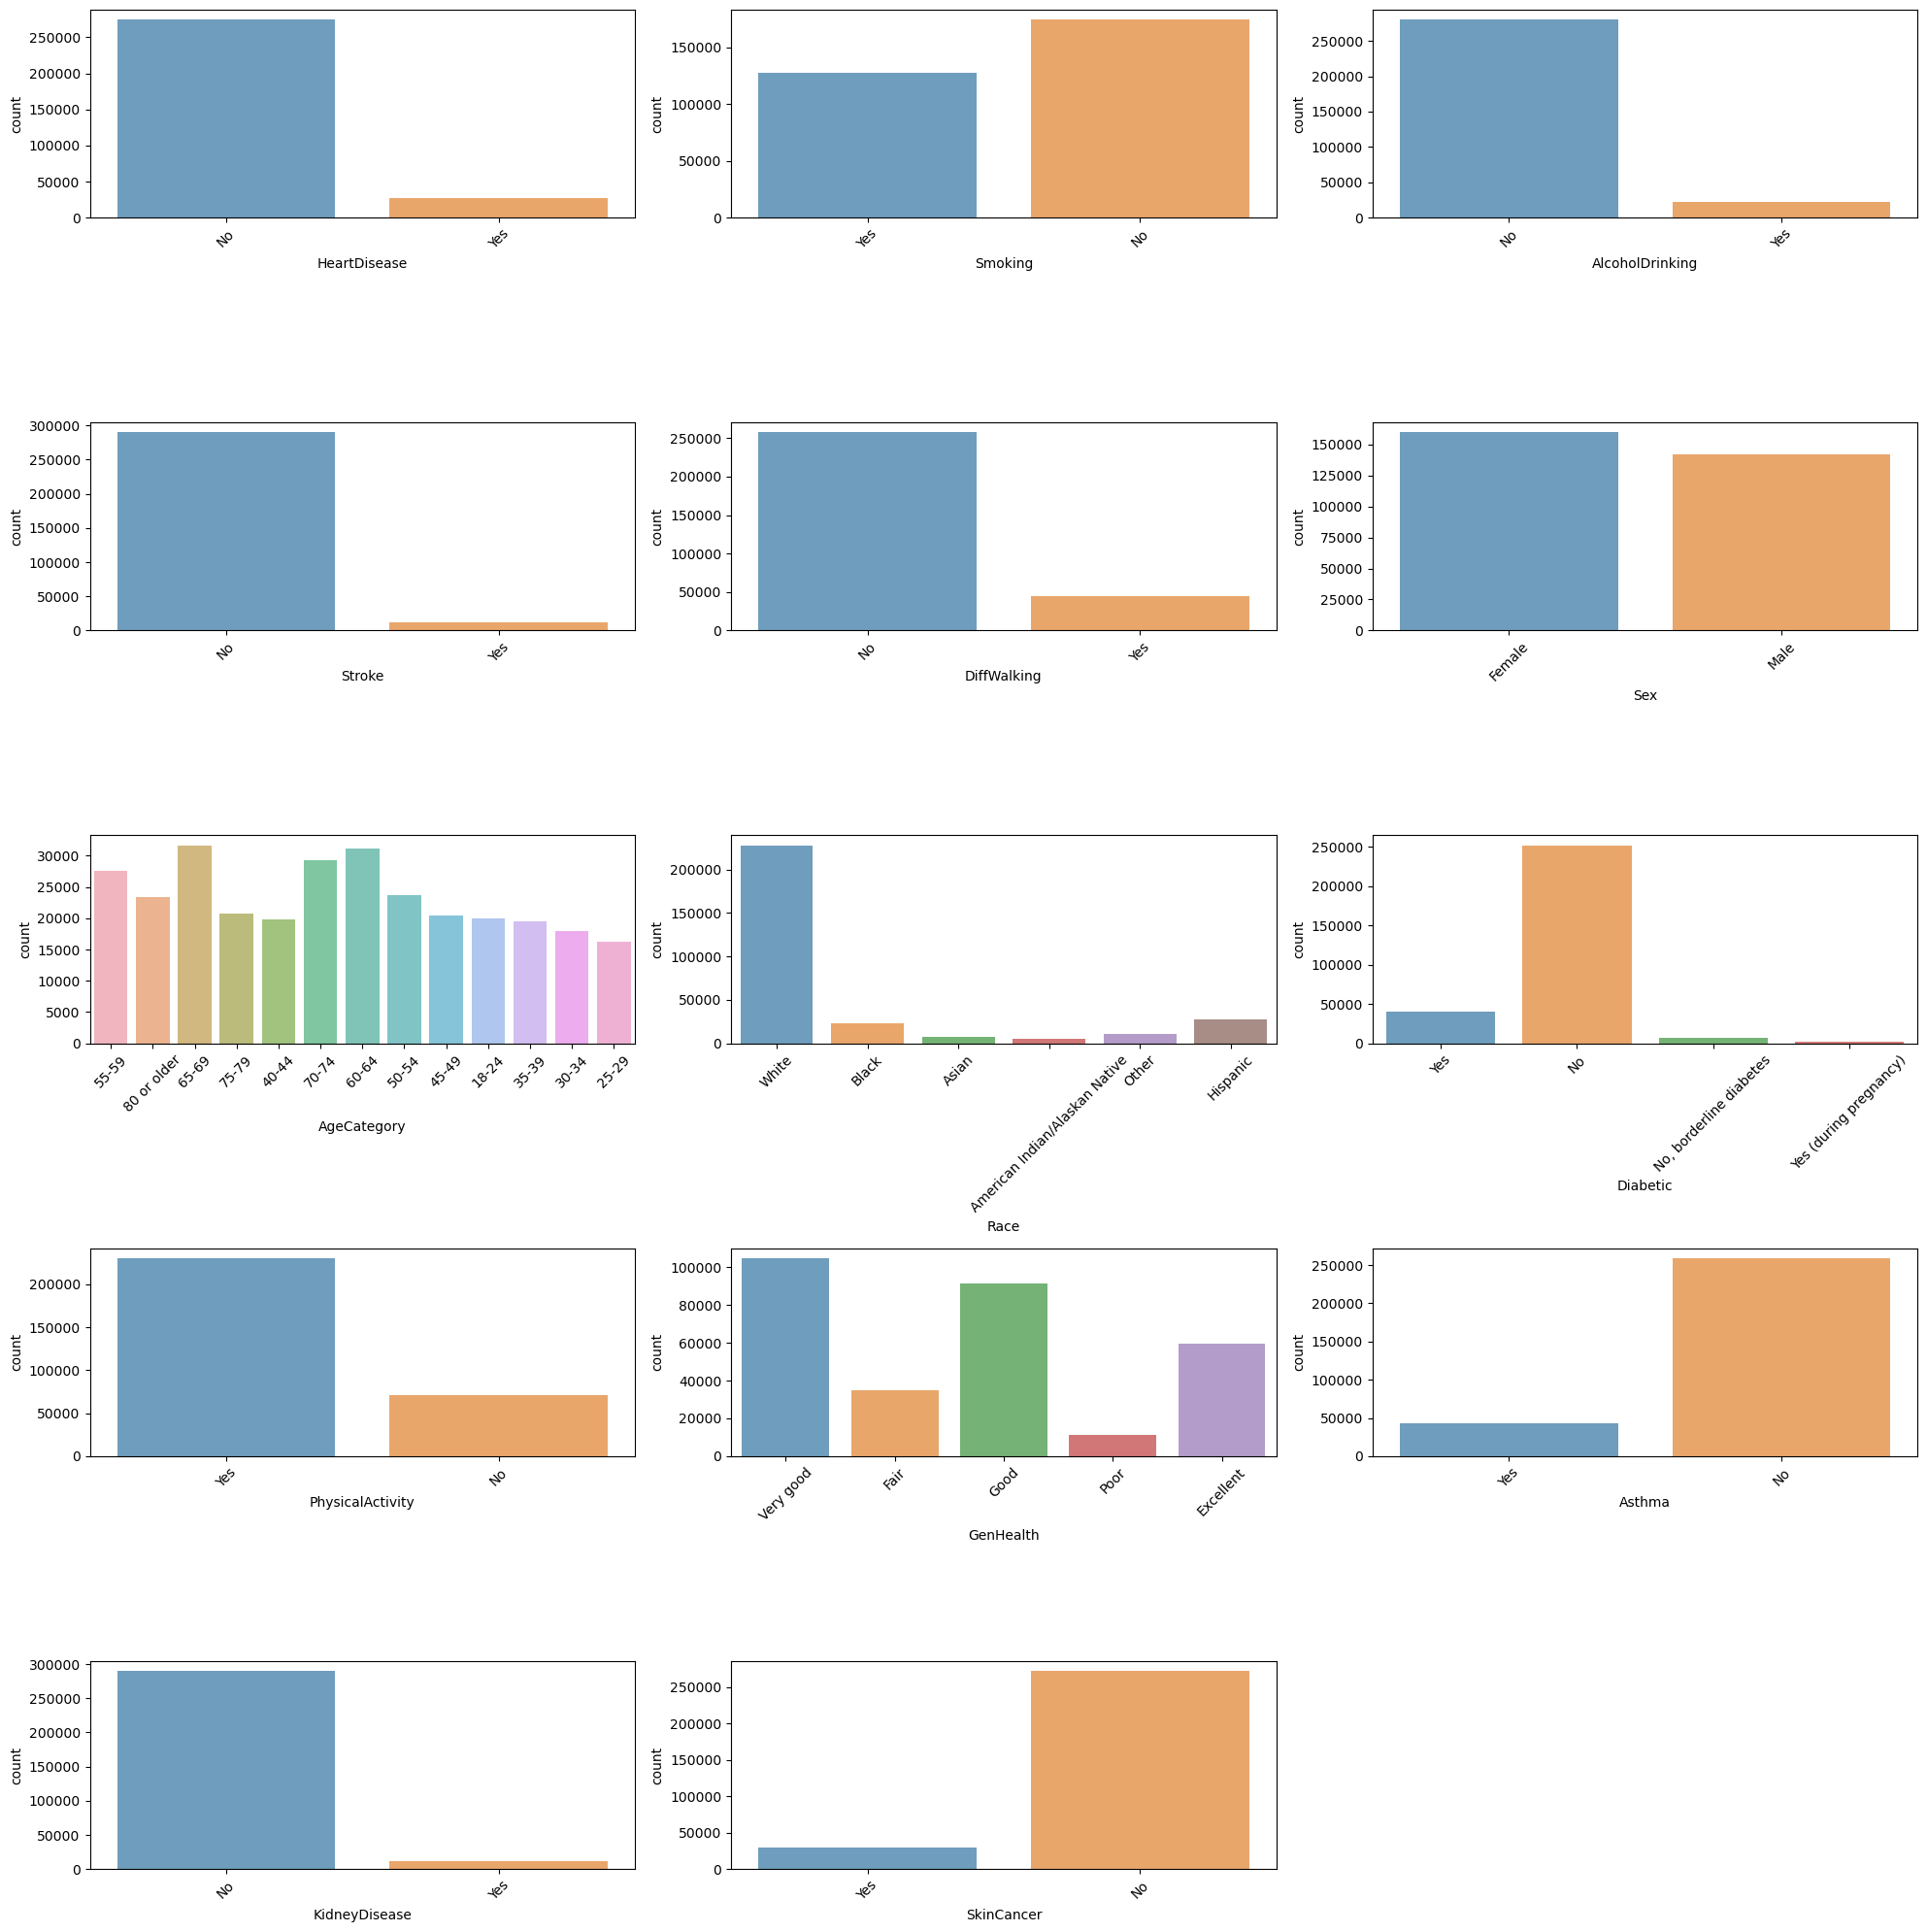

In [7]:
# identify categorical variables
df_cate = df.select_dtypes(include = ['O'])
print('There are {} non numerical features including:\n{}'.format(len(df_cate.columns), df_cate.columns.tolist()))

# distribution of categorical variables
fig, axes = plt.subplots(5, 3, figsize = (20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < len(df_cate.columns):
        ax.tick_params(axis = 'x', rotation = 45)
        sns.countplot(x=df_cate.columns[i], alpha = 0.7, data = df_cate, ax = ax)
    else:
        ax.axis('off')

fig.tight_layout()
plt.show()

### Re-ordering the X-Axis for AgeCategory

['18-24', '25-29', '30-34', '35-39', '40-44', ..., '60-64', '65-69', '70-74', '75-79', '80 or older']
Length: 13
Categories (13, object): ['18-24' < '25-29' < '30-34' < '35-39' ... '65-69' < '70-74' < '75-79' < '80 or older']


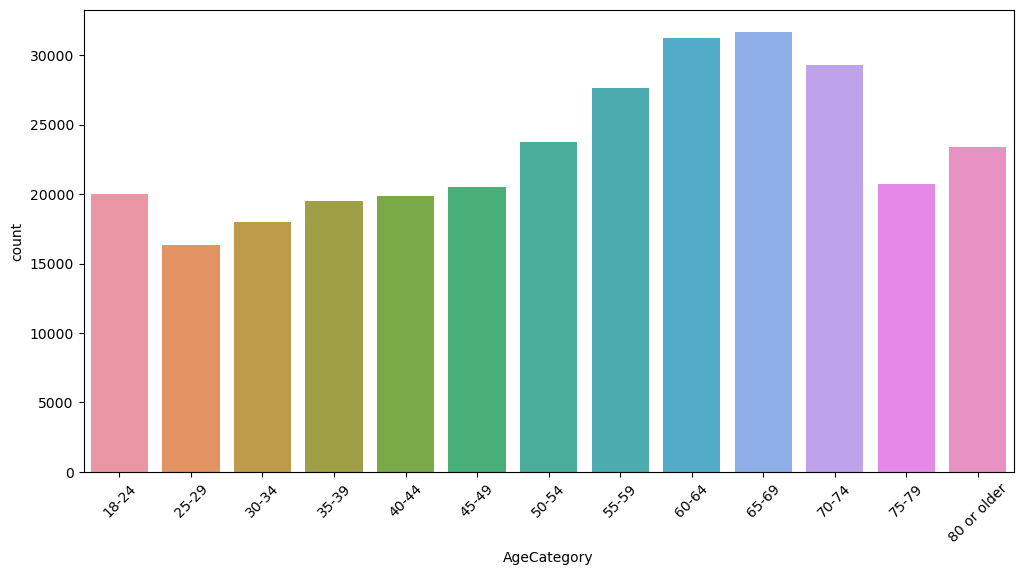

In [8]:
# in order for the x-axis of the age column to appear in ascending order on the x-axis of our plot, we must:

# Define a custom order for the age groups
ordered_categories = [
    "18-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80 or older" ]

# Convert AgeCategory to a categorical type with the specified order
df['AgeCategory'] = pd.Categorical(df['AgeCategory'], categories=ordered_categories, ordered=True)

df.sort_values(by='AgeCategory', inplace=True) # transform orginal df ordering for this feature
print(df['AgeCategory'].unique())

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='AgeCategory', data=df, order=ordered_categories, ax=ax)
ax.tick_params(axis='x', rotation=45)
plt.show()

### Re-ordering GenHealth

<Axes: xlabel='GenHealth', ylabel='n'>

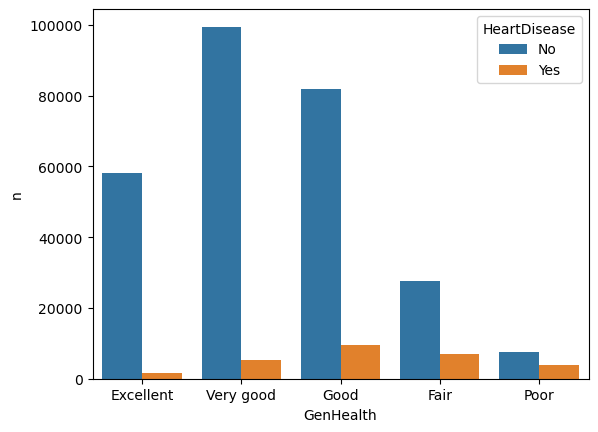

In [9]:
'''heart_genhealth = df.groupby(['GenHealth', 'HeartDisease'], ).agg(n = ('GenHealth', 'count'))
heart_genhealth

sns.barplot(heart_genhealth, x= 'GenHealth', y = 'n', hue = 'HeartDisease',
            order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])'''


### RUN THIS CODE IN JUPYTER NOTEBOOK, THE ABOVE CODE WILL NOT WORK:
# Group by and aggregate the counts
heart_genhealth = df.groupby(['GenHealth', 'HeartDisease']).agg(n=('GenHealth', 'count')).reset_index()

# Create the barplot
sns.barplot(
    data=heart_genhealth,
    x='GenHealth',
    y='n',
    hue='HeartDisease',
    order=['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
)

### Comparing Heart Disease == Yes vs. Heart Disease == No for Categorical Features

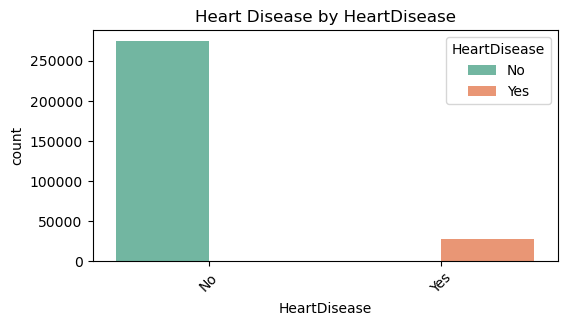

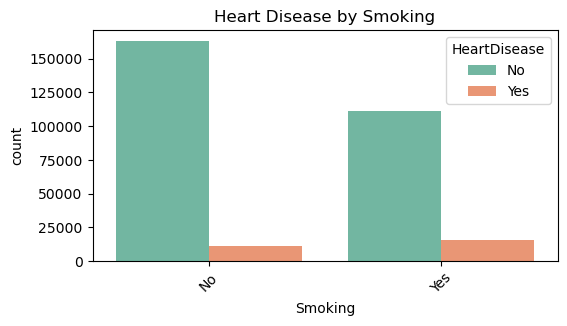

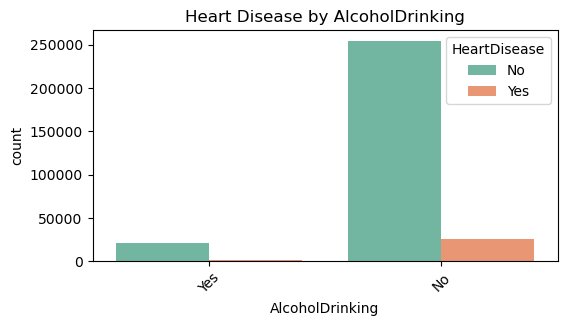

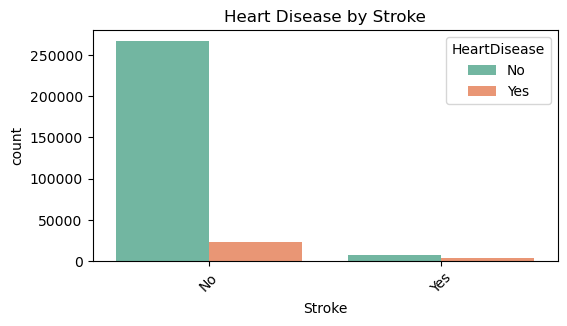

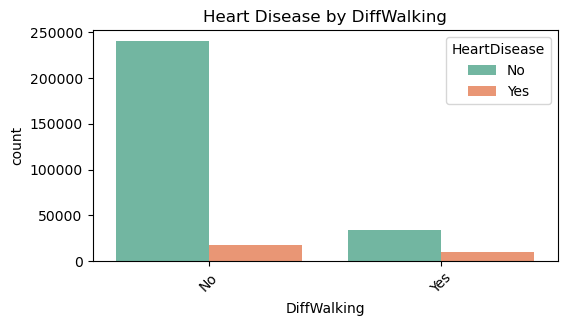

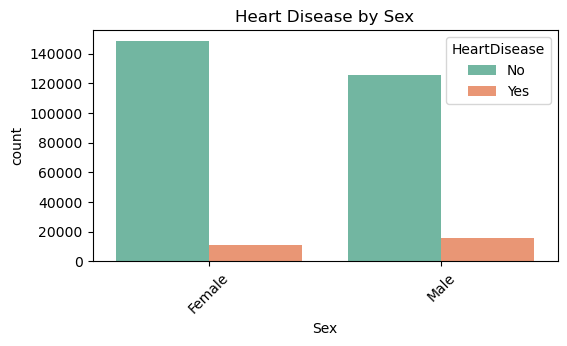

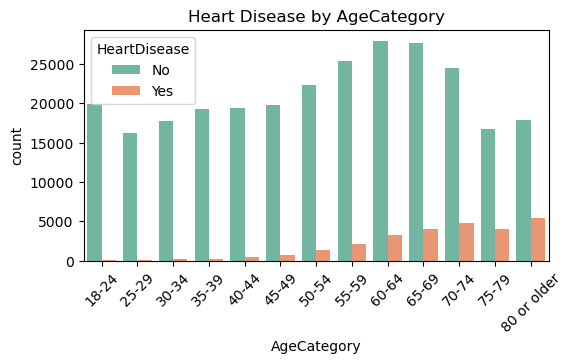

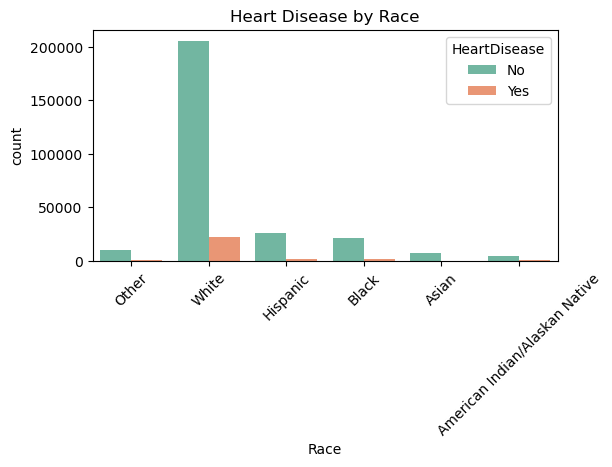

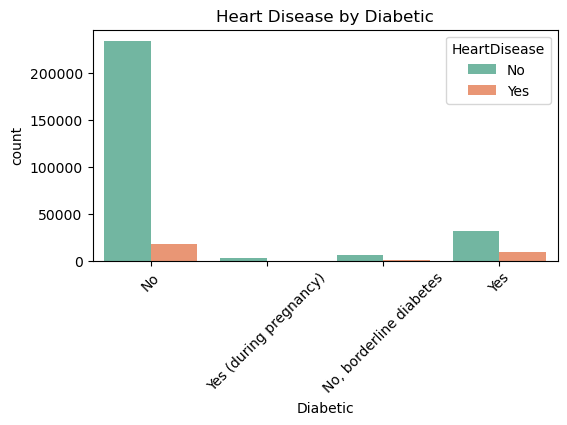

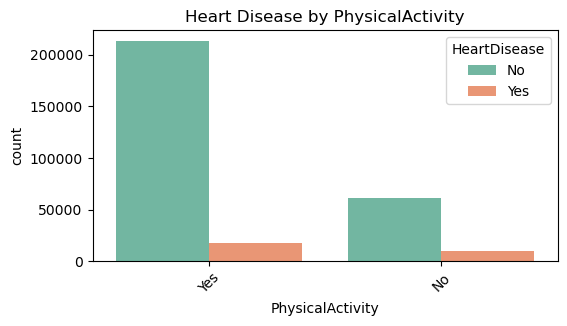

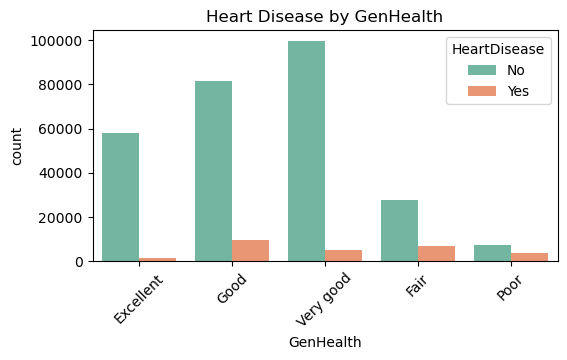

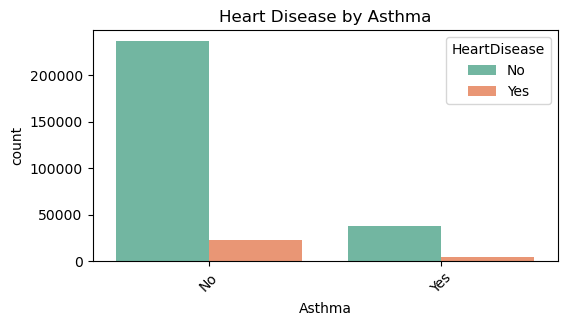

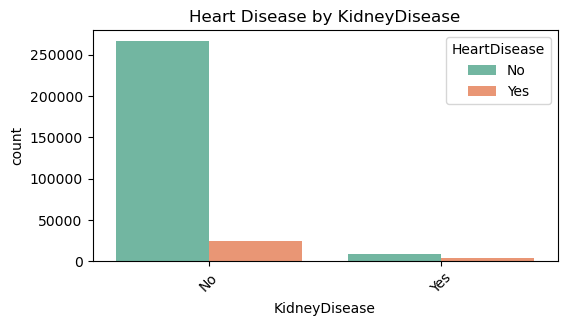

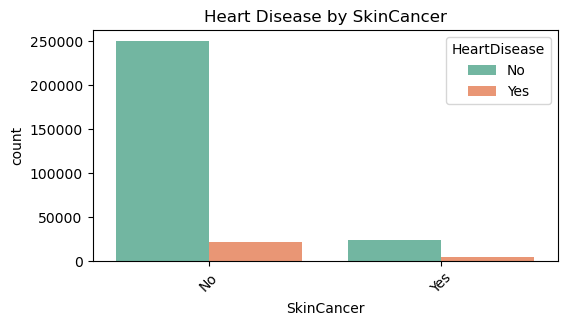

In [10]:
categorical_features = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                        'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# relationship between HeartDisease and other categorical features
for feature in categorical_features:
    plt.figure(figsize = (6, 3))
    sns.countplot(data = df, x = feature, hue = 'HeartDisease', palette = 'Set2')
    plt.title(f'Heart Disease by {feature}')
    plt.xticks(rotation = 45)
    plt.show()

### Distribution of Race for Heart Disease Patients

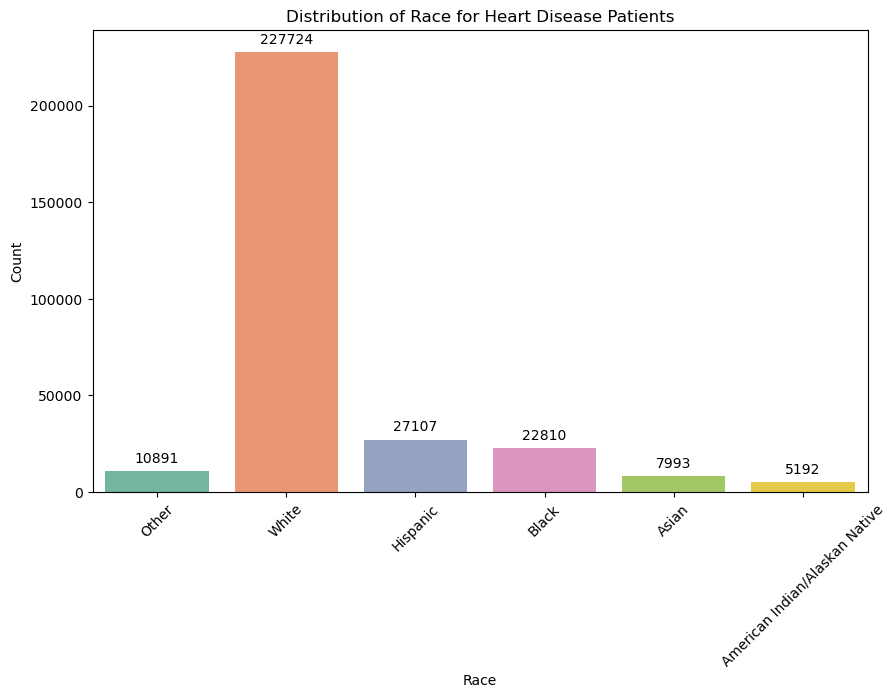

In [11]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'Race', data = df, palette = 'Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')
plt.title('Distribution of Race for Heart Disease Patients')
plt.xlabel('Race')
plt.ylabel('Count')
ax.tick_params(axis='x', rotation=45)
plt.show()

### Creating a new age feature

Text(0.5, 1.0, 'Heart Disease by Age Group')

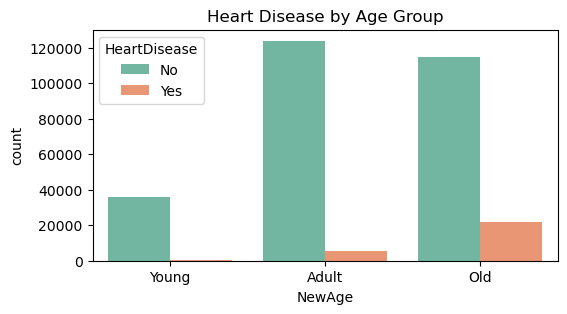

In [12]:
age_mapping = {
    '18-24': 'Young',
    '25-29': 'Young',
    '30-34': 'Adult',
    '35-39': 'Adult',
    '40-44': 'Adult',
    '45-49': 'Adult',
    '50-54': 'Adult',
    '55-59': 'Adult',
    '60-64': 'Old',
    '65-69': 'Old',
    '70-74': 'Old',
    '75-79': 'Old',
    '80 or older': 'Old'}

age_order = ["Young", "Adult", "Old"]

df['NewAge'] = df['AgeCategory'].map(age_mapping) # distribution of HeartDisease by NewAge
plt.figure(figsize = (6, 3))
sns.countplot(data = df, x = 'NewAge', hue = 'HeartDisease', palette='Set2', order = age_order)
plt.title('Heart Disease by Age Group')


### Feature Enginering BMI

In [13]:
# BMI ranges to label
bins = [0, 18.5,
        24.9,
        29.9,
        34.9,
        39.9,
        float('inf')]

# labels based on known BMI ranges: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html
labels = ['Underweight',
          'Normal weight',
          'Overweight', # overweight is 25 to 29
          'Obesity\n(Low-Risk)', # 30 to 34.9
          'Obesity\n(Moderate-Risk)',
          'Obesity\n(High-Risk)']

df['BMI_Category'] = pd.cut(df['BMI'], bins = bins,
          labels = labels, right = False)

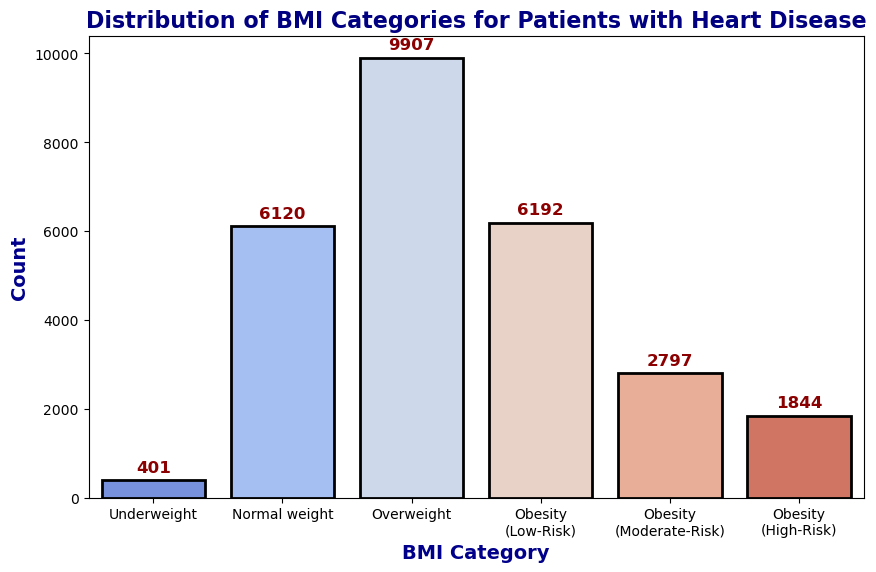

In [14]:
# Filter dataset for heart disease patients
df_heart_disease = df[df['HeartDisease'] == 'Yes']

plt.figure(figsize=(10,6))

ax = sns.countplot(x='BMI_Category', data=df_heart_disease, palette='coolwarm', edgecolor='black', linewidth=2)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points',
                fontsize=12, color='darkred', fontweight='bold')

plt.title('Distribution of BMI Categories for Patients with Heart Disease', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('BMI Category', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkblue')

plt.show()


# More Data Pre-Processing

In [15]:
# Transforming binary values

# Seeing which columns have yes and no entries / are binary:
for column in df.columns:
    unique_values = df[column].unique()
    # Check if 'Yes' and 'No' are in the unique values
    if 'Yes' in unique_values and 'No' in unique_values:
        print(f'Column "{column}"')

# Replace 'Yes' with 1 and 'No' with 0 for all relevant columns
df.replace({"Yes": 1, "No": 0}, inplace=True)

# other columns to replace no and yes with:
df['Diabetic'] = df['Diabetic'].replace(['Yes', 'Yes (during pregnancy)', 'No', 'No, borderline diabetes'], [1, 1, 0, 0])

df = df.replace('Female','0')
df = df.replace('Male','1')

Column "HeartDisease"
Column "Smoking"
Column "AlcoholDrinking"
Column "Stroke"
Column "DiffWalking"
Column "Diabetic"
Column "PhysicalActivity"
Column "Asthma"
Column "KidneyDisease"
Column "SkinCancer"


/var/folders/3y/thvvzmld4hn5tt9tvr360_z40000gn/T/ipykernel_71072/1693227820.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'Yes' in unique_values and 'No' in unique_values:


In [16]:
#df.head()

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Could use ordinal encoding on AgeCategory and GenHealth
ordinal_cols = ['AgeCategory', 'GenHealth']
ordinal_mappings = {
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54', '55-59',
                    '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'] }

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,NewAge,BMI_Category
75124,0,21.79,0,1,0,0.0,15.0,0,0,0.0,Other,0,1,4.0,8.0,0,0,0,Young,Normal weight
227676,0,21.95,0,0,0,0.0,5.0,0,0,0.0,White,0,1,4.0,10.0,0,0,0,Young,Normal weight
177226,0,25.68,1,1,0,0.0,0.0,0,1,0.0,White,0,1,4.0,4.0,0,0,0,Young,Overweight
177220,0,26.50,1,1,0,1.0,5.0,0,1,0.0,White,0,1,2.0,6.0,0,0,0,Young,Overweight
177219,0,24.69,0,1,0,0.0,0.0,0,0,0.0,White,0,1,2.0,9.0,0,0,0,Young,Normal weight


# Correlation

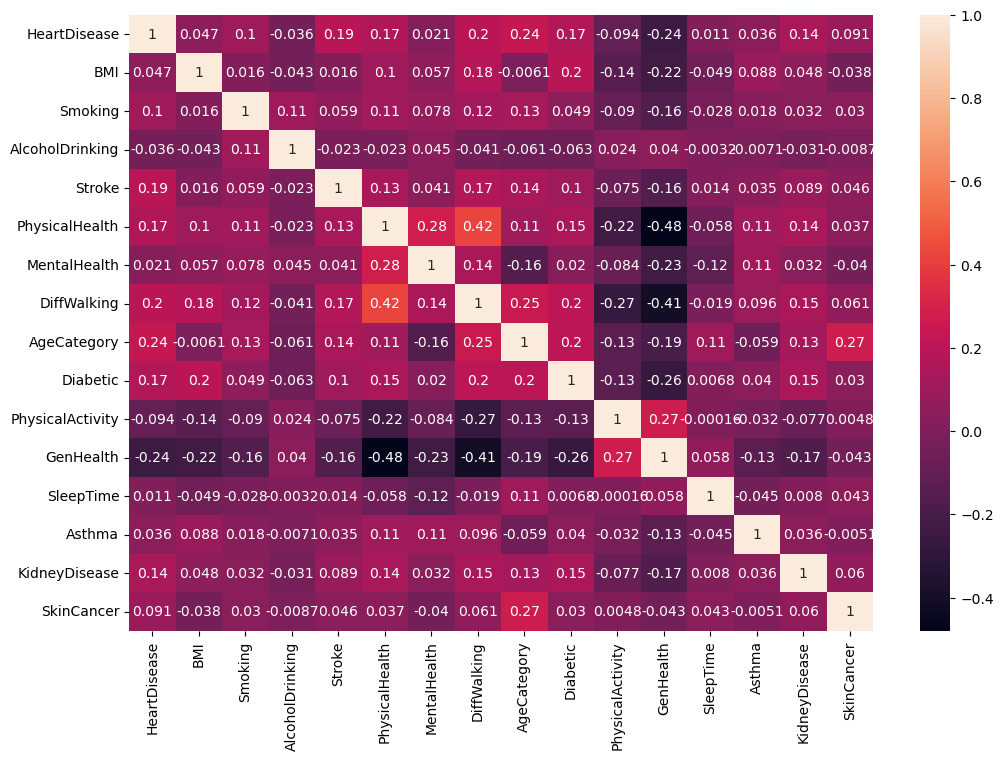

In [19]:
df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

There is a positive relationship between heart disease and age (0.24), which corresponds with our data visualization displaying age and heart disease. However, this correlation is weak. Other correlations are self-explanatory and logical. For instance, the correlation matrix indicates that a higher difficulty of walking corresponds with reduced physical health.

# Feature Engineering

In [20]:
feat_eng_df = df.copy()

### Normalizing

In [21]:
# function for normalizing data in columns
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

### HealthRiskScore

In [22]:
# create MedicalHistory (higher score represents worse medical history)

# change "Yes" to 1 and "No" to 0
feat_eng_df['Asthma'] = feat_eng_df['Asthma'].map({'Yes': 1, 'No': 0})
feat_eng_df['KidneyDisease'] = feat_eng_df['KidneyDisease'].map({'Yes': 1, 'No': 0})
feat_eng_df['SkinCancer'] = feat_eng_df['SkinCancer'].map({'Yes': 1, 'No': 0})

# create the MedicalHistory feature as a sum of the three conditions
feat_eng_df['MedicalHistory'] = feat_eng_df['Asthma'] + feat_eng_df['KidneyDisease'] + feat_eng_df['SkinCancer']

### RiskBehaviorScore

In [23]:
# create RiskBehaviorScore (higher score represents higher risk)

# change "Yes" to 1 and "No" to 0 for Smoking, AlcoholDrinking, and PhysicalActivity
feat_eng_df['Smoking'] = feat_eng_df['Smoking'].map({'Yes': 1, 'No': 0})
feat_eng_df['AlcoholDrinking'] = feat_eng_df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
feat_eng_df['PhysicalActivity'] = feat_eng_df['PhysicalActivity'].map({'Yes': 1, 'No': 0})

# Calculate HealthRiskScore:
# Smoking and AlcoholDrinking are both risk behaviors, contributing positively to the score when they are present.
# PhysicalActivity is a protective behavior against health risks. By subtracting it, the score is reduced when a person engages
# in physical activity, indicating a lower overall risk.

feat_eng_df['RiskBehaviorScore'] = feat_eng_df['Smoking'] + feat_eng_df['AlcoholDrinking'] - feat_eng_df['PhysicalActivity']

### MedicalHistory

In [24]:
# Create HealthRiskScore (higher score represents worse overall health)

# normalize columns factoring into HealthRiskScore
feat_eng_df['BMI_Score'] = normalize(feat_eng_df['BMI'])
feat_eng_df['PhysicalHealth_Score'] = normalize(feat_eng_df['PhysicalHealth'])
feat_eng_df['MentalHealth_Score'] = normalize(feat_eng_df['MentalHealth'])

# define weights
w1, w2, w3 = 2/5, 2/5, 1/5

# calculate HealthRiskScore
feat_eng_df['HealthRiskScore'] = (w1 * feat_eng_df['BMI_Score'] +
                                  w2 * feat_eng_df['PhysicalHealth_Score'] +
                                  w3 * feat_eng_df['MentalHealth_Score'])


# Random Forest Baseline Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

initial = df.copy()

# label encoding converts cat features to numeric
for col in initial.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    initial[col] = le.fit_transform(initial[col])

# define X (features) and target variable
X = initial.drop(columns = ['HeartDisease', 'AgeCategory', 'BMI_Category'])
y = initial['HeartDisease'].drop(columns = ['AgeCategory'])

# split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# train the random forest classifier
rf_model = RandomForestClassifier(n_estimators = 100, max_depth=5) # adding max_depth increased accuracy
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# evaluate for training data
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Data Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Data Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

print("")

# evaluate for testing data
print("Testing Data Accuracy:", accuracy_score(y_test, y_pred))
print("\nTesting Data Classification Report:\n", classification_report(y_test, y_pred))
print("\nTesting Data Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Data Accuracy: 0.9100761833514046

Training Data Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95    192068
           1       0.76      0.01      0.02     19133

    accuracy                           0.91    211201
   macro avg       0.84      0.51      0.49    211201
weighted avg       0.90      0.91      0.87    211201


Training Data Confusion Matrix:
 [[192005     63]
 [ 18929    204]]

Testing Data Accuracy: 0.9107671571876795

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     82388
           1       0.72      0.01      0.02      8128

    accuracy                           0.91     90516
   macro avg       0.82      0.50      0.49     90516
weighted avg       0.89      0.91      0.87     90516


Testing Data Confusion Matrix:
 [[82356    32]
 [ 8045    83]]


Top 10 Features:
           Feature  Importance
11       GenHealth    0.229564
3           Stroke    0.183150
16          NewAge    0.162280
6      DiffWalking    0.147111
9         Diabetic    0.084457
4   PhysicalHealth    0.057392
14   KidneyDisease    0.049240
7              Sex    0.036472
1          Smoking    0.020983
15      SkinCancer    0.013024


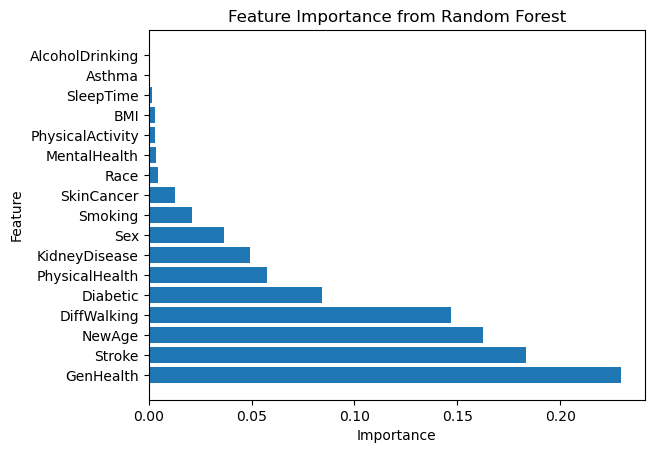

In [26]:
# feature importance
# feature names
feature_names = X.columns if hasattr(X, 'columns') else [f'Feature_{i}' for i in range(X.shape[1])]

# get feature importances
feature_importances = rf_model.feature_importances_

# create importance_df for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances })

# sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# display top features
print("Top 10 Features:")
print(importance_df.head(10))

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Logistic Regression Baseline Model

In [27]:
from sklearn.linear_model import LogisticRegression

# label encoding converts cat features to numeric
for col in initial.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    initial[col] = le.fit_transform(initial[col])

# define features (X) and target variable (y)
X = initial.drop(columns = ['HeartDisease', 'AgeCategory', 'BMI_Category'])
y = initial['HeartDisease'].drop(columns = ['AgeCategory'])

# split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# train logistic regression model
logistic_regression = LogisticRegression(max_iter = 1000)
logistic_regression.fit(X_train, y_train)

# predict
y_pred = logistic_regression.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9099938132484865

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82290
           1       0.53      0.09      0.16      8226

    accuracy                           0.91     90516
   macro avg       0.72      0.54      0.55     90516
weighted avg       0.88      0.91      0.88     90516


Confusion Matrix:
 [[81620   670]
 [ 7477   749]]


# Imbalanced Data

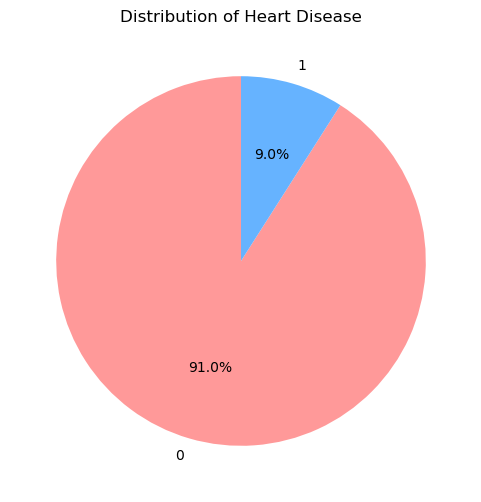

In [28]:
# Pie chart

# Count the occurrences of each category in 'Heart Disease'
counts = df["HeartDisease"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    colors=["#ff9999", "#66b3ff"],
    startangle=90,
)
# explode=(0.1, 0)  # Explode the 'Yes' slice slightly for emphasis *
plt.title("Distribution of Heart Disease")
plt.show()

## Applying SMOTE to Training Data

In [29]:
X = df.drop(columns = ['HeartDisease', 'NewAge', 'BMI_Category', 'Race'])
y = df['HeartDisease']

In [30]:
# Standardize: because SMOTE relies on distance calculations, it can be sensitive to feature scaling.

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_scaled

array([[-1.02842347, -0.8549281 ,  3.60287072, ..., -0.40575081,
        -0.20153203, -0.32790726],
       [-1.00368677, -0.8549281 , -0.27755645, ..., -0.40575081,
        -0.20153203, -0.32790726],
       [-0.42701258,  1.169689  ,  3.60287072, ..., -0.40575081,
        -0.20153203, -0.32790726],
       ...,
       [-0.10698159, -0.8549281 , -0.27755645, ..., -0.40575081,
        -0.20153203, -0.32790726],
       [ 0.25788466, -0.8549281 , -0.27755645, ..., -0.40575081,
        -0.20153203, -0.32790726],
       [ 2.8011261 , -0.8549281 , -0.27755645, ..., -0.40575081,
        -0.20153203, -0.32790726]])

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [32]:
# Split: apply smote only on the training set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [34]:
# Predict on the original test set (not resampled)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# evaluate for training data
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Data Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Data Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

print("")

# evaluate for testing data
print("Testing Data Accuracy:", accuracy_score(y_test, y_pred))
print("\nTesting Data Classification Report:\n", classification_report(y_test, y_pred))
print("\nTesting Data Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Data Accuracy: 0.9966761521015526

Training Data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    192145
           1       0.98      0.98      0.98     19056

    accuracy                           1.00    211201
   macro avg       0.99      0.99      0.99    211201
weighted avg       1.00      1.00      1.00    211201


Training Data Confusion Matrix:
 [[191816    329]
 [   373  18683]]

Testing Data Accuracy: 0.8762539219585488

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     82311
           1       0.28      0.23      0.25      8205

    accuracy                           0.88     90516
   macro avg       0.60      0.58      0.59     90516
weighted avg       0.87      0.88      0.87     90516


Testing Data Confusion Matrix:
 [[77434  4877]
 [ 6324  1881]]


## Testing something - disregard this

**Quantifying the trade-offs between false positives, false negatives, and overall accuracy**

We can see how resampling ipacts F1-score and cost to choose the appropriate ratio.

In [36]:
# Visualize results
def plot_tradeoffs(results):
    ratios = [res['Ratio'] for res in results]
    f1_scores = [res['F1-Score'] for res in results]
    costs = [res['Cost'] for res in results]

    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Resampling Ratio (Majority:Minority)')
    ax1.set_ylabel('F1-Score', color='tab:blue')
    ax1.plot(ratios, f1_scores, color='tab:blue', label='F1-Score')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Cost', color='tab:red')
    ax2.plot(ratios, costs, color='tab:red', label='Cost')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Trade-Offs Between F1-Score and Cost')
    plt.show()

/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will

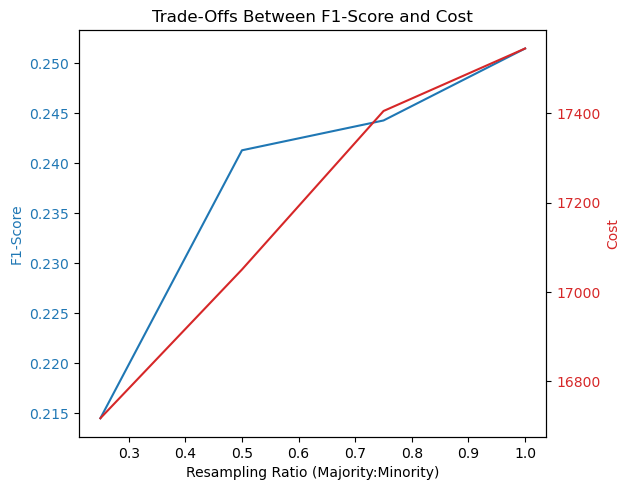

In [37]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

def evaluate_resampling(X_train, y_train, X_test, y_test, ratios, cost_weights):
    results = []

    for ratio in ratios:
        # Apply SMOTE with the given ratio
        smote = SMOTE(sampling_strategy=ratio)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Train Random Forest model
        model = RandomForestClassifier()
        model.fit(X_train_resampled, y_train_resampled)

        # Predict on original test set
        y_pred = model.predict(X_test)

        # Metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        precision = report['1']['precision']
        recall = report['1']['recall']
        f1 = report['1']['f1-score']

        # Calculate cost (weights can be adjusted)
        FP = np.sum((y_pred == 1) & (y_test == 0))
        FN = np.sum((y_pred == 0) & (y_test == 1))
        cost = cost_weights[0] * FP + cost_weights[1] * FN

        results.append({
            'Ratio': ratio,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Cost': cost })

    return results


ratios = [0.25, 0.5, 0.75, 1.0]  # Majority-minority resampling ratios / proportion of minority class samples
cost_weights = [1, 2]  # Example weights for FP and FN:
                        # weights assigned this way because FN is more costly than a FP
results = evaluate_resampling(X_train, y_train, X_test, y_test, ratios, cost_weights)
plot_tradeoffs(results)

The F1 score balances the trade-off between precision and recall:

- High precision means the model is good at predicting "disease" without many false positives.
- High recall means the model is good at identifying most of the actual "disease" cases.

A high F1 score indicates the model is improving in both precision and recall or balancing the trade-off between the two.
A higher F1 score generally means a better trade-off for the resampling strategy or cost weighting.

## SMOTE with sampling_strategy = 0.5

In [38]:
from imblearn.over_sampling import SMOTE

# Adjusted sampling strategy to resample the minority class to 50% of the majority class
smote = SMOTE(sampling_strategy = 0.5)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (not resampled)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# evaluate for training data
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Data Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Data Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

print("")

# evaluate for testing data
print("Testing Data Accuracy:", accuracy_score(y_test, y_pred))
print("\nTesting Data Classification Report:\n", classification_report(y_test, y_pred))
print("\nTesting Data Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/anyapatel/anaconda3/lib/python3.11/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Data Accuracy: 0.9963967973636488

Training Data Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    192100
           1       0.99      0.97      0.98     19101

    accuracy                           1.00    211201
   macro avg       0.99      0.99      0.99    211201
weighted avg       1.00      1.00      1.00    211201


Training Data Confusion Matrix:
 [[191834    266]
 [   495  18606]]

Testing Data Accuracy: 0.8829930620000884

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94     82356
           1       0.29      0.20      0.24      8160

    accuracy                           0.88     90516
   macro avg       0.61      0.58      0.59     90516
weighted avg       0.87      0.88      0.87     90516


Testing Data Confusion Matrix:
 [[78285  4071]
 [ 6520  1640]]


We experimented with different sampling strategies to determine the trade-off between securing more true positives (aiding early detection efforts for more people) and avoiding false positives.

## GridSearchCV to Find Best Parameters

In [42]:
from sklearn.model_selection import GridSearchCV

## use x train w smote and y train w smote and do grid search cv to find best parameters
## then use that model with those parameters and test on overall dataset

# Assuming X_train_resampled, y_train_resampled are your SMOTE resampled training data
# Parameters to test
param_grid = {
    'max_depth': [5, 10, 15, 18], # realistically, this can only go up to about 18
    'n_estimators': [50, 100, 200],
    'random_state': [23, 25, 30, 42] }

# Initialize the classifier
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Perform grid search on the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 18, 'n_estimators': 200, 'random_state': 30}
Best cross-validation score: 0.89


## Evaluating New Random Forest Model on Original Data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

second = df.copy()

# label encoding converts cat features to numeric
for col in second.select_dtypes(include = 'object').columns:
    le = LabelEncoder()
    second[col] = le.fit_transform(second[col])

# define X and target variable
X = second.drop(columns = ['HeartDisease', 'AgeCategory', 'BMI_Category'])
y = second['HeartDisease'].drop(columns = ['AgeCategory'])

# split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# train the random forest classifier
rf_model = RandomForestClassifier(n_estimators = 200, max_depth=18, random_state=30)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# evaluate for training data
print("Training Data Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTraining Data Classification Report:\n", classification_report(y_train, y_pred_train))
print("\nTraining Data Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))

print("")

# evaluate for testing data
print("Testing Data Accuracy:", accuracy_score(y_test, y_pred))
print("\nTesting Data Classification Report:\n", classification_report(y_test, y_pred))
print("\nTesting Data Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Data Accuracy: 0.943541933987055

Training Data Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    192156
           1       1.00      0.38      0.55     19045

    accuracy                           0.94    211201
   macro avg       0.97      0.69      0.76    211201
weighted avg       0.95      0.94      0.93    211201


Training Data Confusion Matrix:
 [[192130     26]
 [ 11898   7147]]

Testing Data Accuracy: 0.9096844756728092

Testing Data Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     82300
           1       0.52      0.08      0.14      8216

    accuracy                           0.91     90516
   macro avg       0.72      0.54      0.54     90516
weighted avg       0.88      0.91      0.88     90516


Testing Data Confusion Matrix:
 [[81695   605]
 [ 7570   646]]
